In [1]:
# for tokenizing the text into words and sentences
from nltk import word_tokenize, sent_tokenize

In [2]:
# for removing stop words
from nltk.corpus import stopwords

In [3]:
# for stemming
from nltk.util import ngrams

# for collocations
from nltk.collocations import (
    BigramCollocationFinder,
    TrigramCollocationFinder,
    QuadgramCollocationFinder,
)

In [6]:
# for one-hot encoding, bag of words, tf-idf word embeddings
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer,
    HashingVectorizer,
    TfidfTransformer,
    ENGLISH_STOP_WORDS,
    strip_accents_ascii,
    strip_accents_unicode,
    strip_tags,
)

## Lesson Demo

In [9]:
import warnings

import os
import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords
from nltk.text import TextCollection
from nltk.collocations import BigramCollocationFinder
from nltk.metrics.association import BigramAssocMeasures

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm

tqdm.pandas()
warnings.filterwarnings("ignore")
RANDOM_SEED = 123

### Tokenization

In [10]:
def get_text():
    return """Mary had a little lamb, little lamb,
    little lamb. 'Mary' had a little lamb
    whose fleece was white as snow.
    And everywhere that Mary went
    Mary went, MARY went. Everywhere
    that mary went,
    The lamb was sure to go"""

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/andy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### tokenize a sentence into words

In [14]:
text = get_text()
tokens = nltk.word_tokenize(text, "english")
tokens

['Mary',
 'had',
 'a',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 '.',
 "'Mary",
 "'",
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 '.',
 'And',
 'everywhere',
 'that',
 'Mary',
 'went',
 'Mary',
 'went',
 ',',
 'MARY',
 'went',
 '.',
 'Everywhere',
 'that',
 'mary',
 'went',
 ',',
 'The',
 'lamb',
 'was',
 'sure',
 'to',
 'go']

#### tokenize into sentences

In [15]:
sentences = nltk.sent_tokenize(text, "english")
sentences

['Mary had a little lamb, little lamb,\n    little lamb.',
 "'Mary' had a little lamb\n    whose fleece was white as snow.",
 'And everywhere that Mary went\n    Mary went, MARY went.',
 'Everywhere\n    that mary went,\n    The lamb was sure to go']

#### to split out punctuation from the words it surrounds use the `WordPunctTokenizer`

In [16]:
tokens = nltk.tokenize.WordPunctTokenizer().tokenize(text)
tokens

['Mary',
 'had',
 'a',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 '.',
 "'",
 'Mary',
 "'",
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 '.',
 'And',
 'everywhere',
 'that',
 'Mary',
 'went',
 'Mary',
 'went',
 ',',
 'MARY',
 'went',
 '.',
 'Everywhere',
 'that',
 'mary',
 'went',
 ',',
 'The',
 'lamb',
 'was',
 'sure',
 'to',
 'go']

#### combine a few preprocessing steps into a `tokenize` function

In [17]:
from typing import List


def tokenize(text: str, preserve_case: bool = True) -> List[str]:
    puncuation = set(string.punctuation)
    text_words = []

    for word in nltk.tokenize.WordPunctTokenizer().tokenize(text):
        # Drop punctuation characters
        if word in puncuation:
            continue

        # Change case if needed
        text_words.append(word.lower() if not preserve_case else word)

    return text_words

In [19]:
text_words = tokenize(get_text(), False)
text_words

['mary',
 'had',
 'a',
 'little',
 'lamb',
 'little',
 'lamb',
 'little',
 'lamb',
 'mary',
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 'and',
 'everywhere',
 'that',
 'mary',
 'went',
 'mary',
 'went',
 'mary',
 'went',
 'everywhere',
 'that',
 'mary',
 'went',
 'the',
 'lamb',
 'was',
 'sure',
 'to',
 'go']

### One-hot Encoding

In [22]:
one_hot = pd.get_dummies(text_words)
df = one_hot.astype(int).astype(str)
df[df == "0"] = ""
df

,a,and,as,everywhere,fleece,go,had,lamb,little,mary,snow,sure,that,the,to,was,went,white,whose
0,,,,,,,,,,1,,,,,,,,,
1,,,,,,,1,,,,,,,,,,,,
2,1,,,,,,,,,,,,,,,,,,
3,,,,,,,,,1,,,,,,,,,,
4,,,,,,,,1,,,,,,,,,,,
5,,,,,,,,,1,,,,,,,,,,
6,,,,,,,,1,,,,,,,,,,,
7,,,,,,,,,1,,,,,,,,,,
8,,,,,,,,1,,,,,,,,,,,
9,,,,,,,,,,1,,,,,,,,,


In [29]:
# create a dictionary assigning each token to a unique index
word_dict = dict(zip(one_hot.columns, range(len(one_hot.columns))))
word_dict

{'a': 0,
 'and': 1,
 'as': 2,
 'everywhere': 3,
 'fleece': 4,
 'go': 5,
 'had': 6,
 'lamb': 7,
 'little': 8,
 'mary': 9,
 'snow': 10,
 'sure': 11,
 'that': 12,
 'the': 13,
 'to': 14,
 'was': 15,
 'went': 16,
 'white': 17,
 'whose': 18}

### Bag of Words

In [31]:
# bag of words is the sum of the one-hot encoding
# this tells us how many times each word appears in the text
bag_of_words = dict(zip(one_hot.columns, one_hot.sum()))
bag_of_words

{'a': 2,
 'and': 1,
 'as': 1,
 'everywhere': 2,
 'fleece': 1,
 'go': 1,
 'had': 2,
 'lamb': 5,
 'little': 4,
 'mary': 6,
 'snow': 1,
 'sure': 1,
 'that': 2,
 'the': 1,
 'to': 1,
 'was': 2,
 'went': 4,
 'white': 1,
 'whose': 1}

### Stopwords

In [33]:
# os.listdir("~/nltk_data/corpora/stopwords") # stopwords are not in the nltk_data directory, so we need to download them
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stop_words

[nltk_data] Downloading package stopwords to /home/andy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [38]:
# filter out stop words
filtered_sentence = [w if w.lower() not in stop_words else "" for w in tokens]
filtered_sentence

['Mary',
 '',
 '',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 '.',
 "'",
 'Mary',
 "'",
 '',
 '',
 'little',
 'lamb',
 'whose',
 'fleece',
 '',
 'white',
 '',
 'snow',
 '.',
 '',
 'everywhere',
 '',
 'Mary',
 'went',
 'Mary',
 'went',
 ',',
 'MARY',
 'went',
 '.',
 'Everywhere',
 '',
 'mary',
 'went',
 ',',
 '',
 'lamb',
 '',
 'sure',
 '',
 'go']

In [41]:
# comparing the two side-by-side, we can see the stop words have been removed,
# but most of the contextual information remains
pd.DataFrame({"original": tokens, "filtered": filtered_sentence})

,original,filtered
0,Mary,Mary
1,had,
2,a,
3,little,little
4,lamb,lamb
5,",",","
6,little,little
7,lamb,lamb
8,",",","
9,little,little


### TF-IDF

- need to create a corpus 
- tf-idf is a measure of how important a word is to a document in a collection or corpus
  - it doesn't make sense to use it on a single sentence
- we convert the poem into a "corpus" of sentences, and then apply tf-idf to that corpus

In [55]:
corpus = nltk.sent_tokenize(get_text())
pprint(f"There are {len(corpus)} sentences in the corpus:")
pprint(corpus)

corpus = [tokenize(doc, False) for doc in corpus]
print("\n\nTokenized corpus:\n=================\n\n")
pprint(corpus)

'There are 4 sentences in the corpus:'
['Mary had a little lamb, little lamb,\n    little lamb.',
 "'Mary' had a little lamb\n    whose fleece was white as snow.",
 'And everywhere that Mary went\n    Mary went, MARY went.',
 'Everywhere\n    that mary went,\n    The lamb was sure to go']


Tokenized corpus:


[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'],
 ['mary',
  'had',
  'a',
  'little',
  'lamb',
  'whose',
  'fleece',
  'was',
  'white',
  'as',
  'snow'],
 ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'],
 ['everywhere',
  'that',
  'mary',
  'went',
  'the',
  'lamb',
  'was',
  'sure',
  'to',
  'go']]


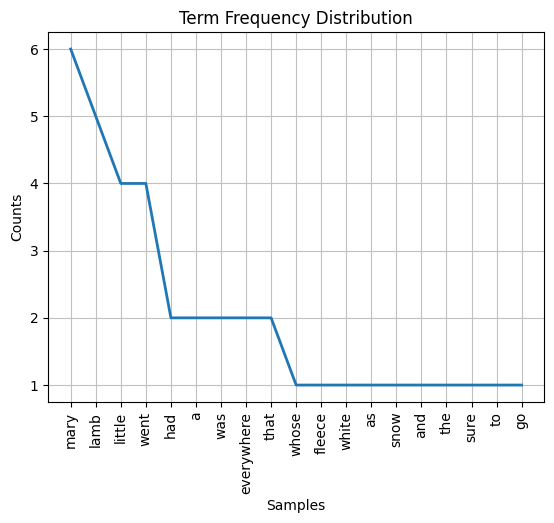

In [60]:
nlp = TextCollection(corpus)
plt.title("Term Frequency Distribution")
nlp.plot()
plt.show()

In [62]:
# can get tf-idf scores for each individual word:
nlp.tf_idf("Mary", corpus[3])

0.0

#### doesn't matter which way you do this, so do it the way that is easier to read/understand:

In [68]:
%%timeit
# or for the entire corpus:
tf_idf = [
    {
        # dictionary of word: tf-idf score
        token: nlp.tf_idf(token, doc)
        # for each word in the document
        for token in doc
    }
    # for each document in the corpus
    for doc in corpus
]

14.3 μs ± 344 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [69]:
%%timeit
tf_idf2 = []

for doc in corpus:
    current = {}
    for token in doc:
        current[token] = nlp.tf_idf(token, doc)
    tf_idf2.append(current)

14.1 μs ± 439 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [70]:
# or for the entire corpus:
tf_idf = [{token: nlp.tf_idf(token, doc) for token in doc} for doc in corpus]

pprint(tf_idf)

[{'a': 0.07701635339554948,
  'had': 0.07701635339554948,
  'lamb': 0.09589402415059362,
  'little': 0.23104906018664842,
  'mary': 0.0},
 {'a': 0.06301338005090412,
  'as': 0.12602676010180824,
  'fleece': 0.12602676010180824,
  'had': 0.06301338005090412,
  'lamb': 0.026152915677434625,
  'little': 0.06301338005090412,
  'mary': 0.0,
  'snow': 0.12602676010180824,
  'was': 0.06301338005090412,
  'white': 0.12602676010180824,
  'whose': 0.12602676010180824},
 {'and': 0.15403270679109896,
  'everywhere': 0.07701635339554948,
  'mary': 0.0,
  'that': 0.07701635339554948,
  'went': 0.23104906018664842},
 {'everywhere': 0.06931471805599453,
  'go': 0.13862943611198905,
  'lamb': 0.028768207245178087,
  'mary': 0.0,
  'sure': 0.13862943611198905,
  'that': 0.06931471805599453,
  'the': 0.13862943611198905,
  'to': 0.13862943611198905,
  'was': 0.06931471805599453,
  'went': 0.06931471805599453}]


### n-grams

In [74]:
def get_ngrams(text: str, length: int = 2) -> List[str]:
    """Generate n-grams from a text.

    Parameters
    ----------
    text : str
        The text to tokenize.
    length : int
        The length of the n-grams. Default is 2, for bigrams.

    Returns
    -------
    List[str]
        A list of n-grams.

    Examples
    --------
    >>> get_ngrams("Mary had a little lamb", 2)
    ['Mary had', 'had a', 'a little', 'little lamb']
    """
    from nltk.util import ngrams

    n_grams = ngrams(tokenize(text), length)
    return [" ".join(grams) for grams in n_grams]

In [75]:
get_ngrams(get_text().lower())

['mary had',
 'had a',
 'a little',
 'little lamb',
 'lamb little',
 'little lamb',
 'lamb little',
 'little lamb',
 'lamb mary',
 'mary had',
 'had a',
 'a little',
 'little lamb',
 'lamb whose',
 'whose fleece',
 'fleece was',
 'was white',
 'white as',
 'as snow',
 'snow and',
 'and everywhere',
 'everywhere that',
 'that mary',
 'mary went',
 'went mary',
 'mary went',
 'went mary',
 'mary went',
 'went everywhere',
 'everywhere that',
 'that mary',
 'mary went',
 'went the',
 'the lamb',
 'lamb was',
 'was sure',
 'sure to',
 'to go']

### Collocations

In order to figure out which n-grams are meaningful, use collocations

In [76]:
bigrams = BigramCollocationFinder.from_words(tokenize(get_text(), False))
scored = bigrams.score_ngrams(BigramAssocMeasures.likelihood_ratio)
scored

[(('little', 'lamb'), 20.789064969512463),
 (('mary', 'went'), 18.154919185356587),
 (('everywhere', 'that'), 15.777294140200038),
 (('had', 'a'), 15.777294140200038),
 (('a', 'little'), 10.232116695720478),
 (('as', 'snow'), 9.301260258907092),
 (('snow', 'and'), 9.301260258907092),
 (('sure', 'to'), 9.301260258907092),
 (('to', 'go'), 9.301260258907092),
 (('white', 'as'), 9.301260258907092),
 (('whose', 'fleece'), 9.301260258907092),
 (('mary', 'had'), 8.139124120662284),
 (('that', 'mary'), 8.139124120662284),
 (('and', 'everywhere'), 6.528671536667327),
 (('fleece', 'was'), 6.528671536667327),
 (('was', 'sure'), 6.528671536667327),
 (('was', 'white'), 6.528671536667327),
 (('went', 'the'), 4.802579101956642),
 (('lamb', 'whose'), 4.297236023525216),
 (('the', 'lamb'), 4.297236023525216),
 (('lamb', 'little'), 3.850143362325084),
 (('went', 'mary'), 3.065215528887738),
 (('went', 'everywhere'), 2.196764352889584),
 (('lamb', 'was'), 1.7502532877068806),
 (('lamb', 'mary'), 0.088193

### word embeddings

In [80]:
word_dict, word_list = {}, []
embeddings = np.zeros((4_000_000, 50), dtype=np.float32)
count = 0

# open the zipped file ./glove.6B.zip to get the embeddings

import zipfile

with zipfile.ZipFile("glove.6B.zip", "r") as z:
    # with open("glove.6B.zip", "rt") as f:
    for line in tqdm(z):
        fields = line.split()
        word = fields[0]
        word_list.append(word)
        word_dict[word] = count
        embeddings[count] = np.array(fields[1:], dtype=np.float32)
        count += 1

0it [00:00, ?it/s]


TypeError: 'ZipFile' object is not iterable